In [13]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline
import pandas as pd

In [15]:
def load_data():
    data = np.loadtxt("C:/Users/RISHABH/Desktop/Machine Learning/ex1data1.txt", delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y
x_train,y_train=load_data()

In [17]:
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [18]:
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [22]:
print("Shape of x_train is",x_train.shape)
print("Shape of y train is",y_train.shape)
print("Number of training example",len(x_train))

Shape of x_train is (97,)
Shape of y train is (97,)
Number of training example 97


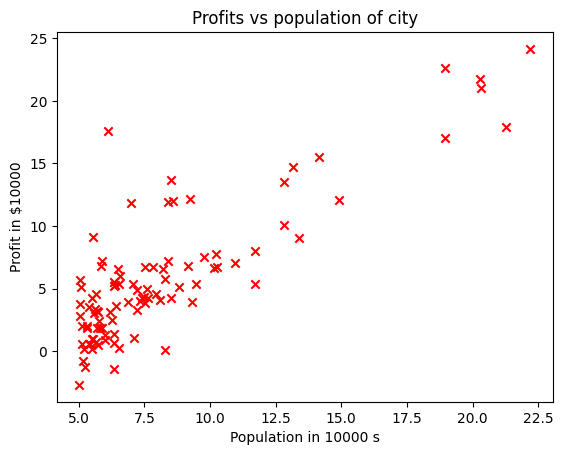

In [23]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Profits vs population of city")
plt.ylabel("Profit in $10000")
plt.xlabel("Population in 10000 s")
plt.show()
           


In [24]:
def compute_cost(x,y,w,b):

    m=x.shape[0]
    total_cost=0.0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        total_cost=total_cost+(f_wb_i-y[i])**2
    total_cost=total_cost/(2*m)
    return total_cost

In [26]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        dj_dw=dj_dw+(f_wb_i-y[i])*x[i]
        dj_db=dj_db+(f_wb_i-y[i])
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db 

In [40]:
def gradient_descent(x,y,w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m=len(x)
    J_history=[]
    w_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(m):
        dj_dw,dj_db=gradient_function(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i<10000:
            cost=cost_function(x,y,w,b)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0:
             w_history.append(w)
             print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [41]:
initial_w=0.
initial_b=0.
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
w,b found by gradient descent: 0.8577717664809001 -0.5585416619786697


In [42]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

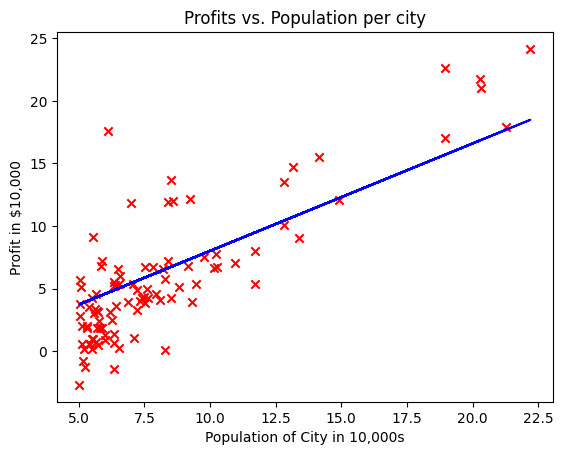

In [43]:
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')